# Notebook 29: The failure envelope

The failure envelope represents the stress conditions under which a rock will transition from a stable state to failure. In the upper crust, the Mohr-Coulomb criterion describes failure in terms of normal and shear tractions ([Ragan, 2009](https://www.cambridge.org/core/books/structural-geology/4D631885C9FBBCDEF90C555445ED1160#)):

$$
\tau=c+\sigma \tan \phi_i
$$

where $\sigma$ and $\tau$ are the normal and shear tractions at failure, and $c$ and $\phi_i$ are the cohesion and angle of internal friction of the rock. It is also useful to express this envelope in terms of the principal stresses ([Jaeger et al., 2007](https://www.wiley.com/en-fr/Fundamentals+of+Rock+Mechanics%2C+4th+Edition-p-9780632057597)):

$$
\sigma_1=2 c \frac{\cos \phi_i}{1-\sin \phi_i}+\sigma_3 \frac{1+\sin \phi_i}{1-\sin \phi_i}
$$

The Mohr-Coulomb failure envelope predicts that a new fault will form at an angle $\beta$ with respect to $\sigma_1$ equal to:

$$
\beta=45^{\circ}-\frac{1}{2} \phi_i
$$

## Pre-existing faults

Rocks are full of discontinuities, and therefore we need another envelope that describes the likelihood for slip on a pre-existing fault. Typically the cohesion on a pre-existing fault is near zero. Thus, the failure envelope for slip on pre-existing faults is ([Ragan, 2009](https://www.cambridge.org/core/books/structural-geology/4D631885C9FBBCDEF90C555445ED1160#)):

$$
\tau = \sigma\tan\phi_s
$$

where $\phi_s$ is the static friction angle of the rock. This failure envelope predicts that the optimal angle $\beta$ for slip on the fault is:

$$
\beta=45^{\circ}-\frac{1}{2} \phi_s
$$

But slip can occur on fault planes of other orientations depending on the principal stresses. This is expressed by the following equation ([Ragan, 2009](https://www.cambridge.org/core/books/structural-geology/4D631885C9FBBCDEF90C555445ED1160#)):

$$
R=\frac{\sigma_1}{\sigma_3}=\frac{1+\mu_s / \tan \beta}{1-\mu_s \tan \beta}
$$

where $\mu_s$ is the coefficient of static friction ($\tan\phi_s$). This equation is useful to determine the principal stresses for renewed slip on a fault with orientation $\beta$.

## Python code

The module [failure_envelope](../functions/failure_envelope.py) implements the equations above, so that it is possible to work with problems involving the failure envelope.

## Application

Let's do this problem from Chapter 10 of  [Marshak and Mitra (1988)](https://books.google.no/books/about/Basic_Methods_of_Structural_Geology.html?id=s94cswEACAAJ&redir_esc=y).

[Handin (1969)](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/jb074i022p05343) described a series of experiments designed to investigate the preference for new fracturing before slip on preexisting rock fractures. He use 2 x 5 cm cylinders of Blair dolomite and made a cut at a specified angle in each sample. These cuts represented pre-existing fractures. The samples were jacketed in lead and placed in a triaxial machine. The stress at which sliding occurred was measured. The experiments were repeated for different fracture orientations, and for a range of confining pressures.

The results of this work are presented in the form of fracture and friction (sliding) envelopes:

<div align="center">

| Rock type | Coulomb Mohr envelope | Friction envelope |
| -------- | ---------- | ---------- |
| Blair Dolomite | $\tau = 45 + \sigma\tan 45$° | $\tau = \sigma\tan 21$° |

</div>

In some specimens deformation was accommodated entirely by movement on the preexisting
fracture, in some specimens deformation was accommodated by formation of a new fracture
in addition to sliding on the preexisting fracture, and in some specimens deformation was accommodated only by initiation of a new fracture.

1. Draw a Mohr Circle diagram, with the Coulomb-Mohr envelope and the friction envelope
of the Blair dolomite. In the diagram, draw a Mohr Circle that represents the stress state at which a shear fracture develops in the dolomite under a confining pressure of 100 MPa.

Sigma 1 = 800 MPa


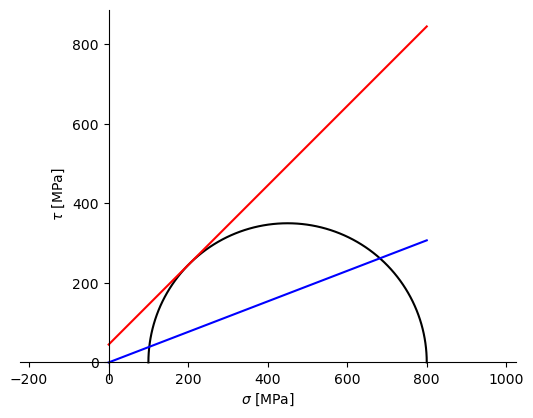

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# this makes visible our functions folder
import sys, os
sys.path.append(os.path.abspath("../functions"))

# import functions 
from failure_envelope import sigma_1_optimal
# import class
from Circle import Circle

# define the parameters
c = 45 # cohesion in MPa
phi_i = np.radians(45) # angle of internal friction in radians
sigma_3 = 100 # confining pressure in MPa

# estimate sigma_1
sigma_1 = sigma_1_optimal(sigma_3, phi_i, c)
print(f"Sigma 1 = {sigma_1:.0f} MPa")

# create the circle
center = (sigma_1+sigma_3)/2
radius = (sigma_1-sigma_3)/2
circle = Circle([center,0], radius)
x, y = circle.coordinates(0, np.pi)

# create the envelopes
x_e = np.array([0, sigma_1])
y_cme = np.tan(phi_i)*x_e + c # Coulomb-Mohr envelope
phi_s = np.radians(21) # angle of static friction in radians
y_fe = np.tan(phi_s)*x_e # friction envelope

# plot
fig, ax = plt.subplots()
# circle
ax.plot(x, y, "k-")
# Mohr-Coulomb envelope
ax.plot(x_e, y_cme, "r-")
# friction envelope
ax.plot(x_e, y_fe, "b-")
# horizontal and vertical lines at 0
#ax.axhline(0,color="k",linestyle="--")
#ax.axvline(0,color="k",linestyle="--")
# axes labels
ax.set_xlabel(r"$\sigma$ [MPa]")
ax.set_ylabel(r"$\tau$ [MPa]")
# axes equal
ax.axis("equal")
# move axes to zero
ax.spines["bottom"].set_position("zero")
ax.spines["left"].set_position("zero")
# remove right and top spines
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

2. If a new shear fracture develops in the sample, what would be normal and shear tractions on the new fracture? What would be the orientation of the new fracture with respect to $\sigma_1$?

Angle of fracture with sigma 1 = 22.5°
Normal traction on fracture = 203 MPa
Shear traction on fracture = 248 MPa


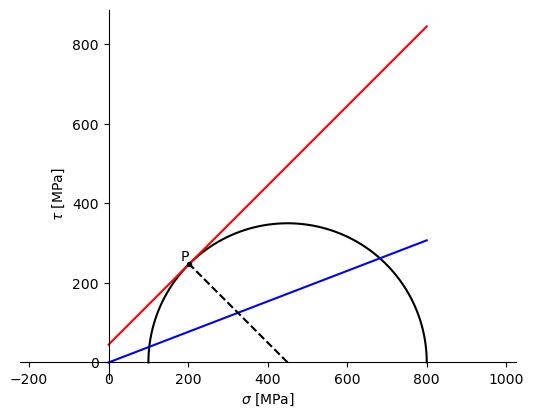

In [2]:
# beta: angle of fracture with sigma_1
beta = np.pi/4 - phi_i/2
# angle of normal to fracture with sigma_1
theta = np.pi/4 + phi_i/2
# normal and shear tractions on fracture
tractions = circle.coordinates_at_angle(2*theta)

print(f"Angle of fracture with sigma 1 = {np.degrees(beta):.1f}°")
print(f"Normal traction on fracture = {tractions[0]:.0f} MPa")
print(f"Shear traction on fracture = {tractions[1]:.0f} MPa")

# plot
fig, ax = plt.subplots()
# circle
ax.plot(x, y, "k-")
# Mohr-Coulomb envelope
ax.plot(x_e, y_cme, "r-")
# friction envelope
ax.plot(x_e, y_fe, "b-")
# fracture
ax.plot([center, tractions[0]], [0, tractions[1]], "k--")
# point P
ax.plot(tractions[0], tractions[1], "k.")
ax.text(tractions[0], tractions[1], "P", va="bottom", ha="right")
# axes labels
ax.set_xlabel(r"$\sigma$ [MPa]")
ax.set_ylabel(r"$\tau$ [MPa]")
# axes equal
ax.axis("equal")
# move axes to zero
ax.spines["bottom"].set_position("zero")
ax.spines["left"].set_position("zero")
# remove right and top spines
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

3. What is the range of orientations for which slip on a preexisting fracture is favored over formation of a new fracture through intact Blair dolomite? Give these orientations with respect to $\sigma_1$ (this is the angle $\beta$).

Range of beta orientations for frictional slip is
3.2 to 65.8°


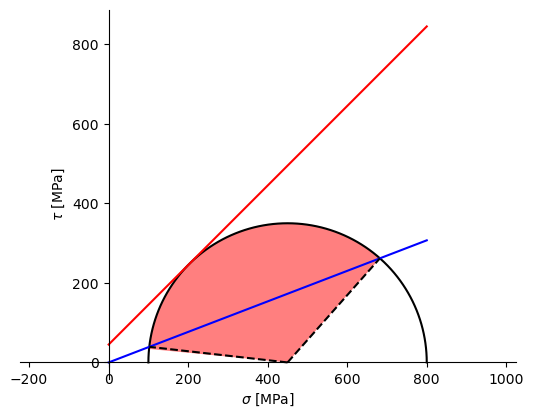

In [3]:
# intersections of friction envelope with circle
ints = circle.line_intersections(np.tan(phi_s), 0)
# angle of first intersection 
angle_1 = circle.angle_at_coordinates(ints[0][0], ints[0][1]) 
# angle of second intersection
angle_2 = circle.angle_at_coordinates(ints[1][0], ints[1][1])
# angles beta_1 and beta_2
beta_1 = (np.pi - angle_1)/2
beta_2 = (np.pi - angle_2)/2
# make beta_1 the smaller angle
if beta_1 > beta_2:
    beta_1, beta_2 = beta_2, beta_1
# output results
print(f"Range of beta orientations for frictional slip is")
print(f"{np.degrees(beta_1):.1f} to {np.degrees(beta_2):.1f}°")

# plot
fig, ax = plt.subplots()
# circle
ax.plot(x, y, "k-")
# Mohr-Coulomb envelope
ax.plot(x_e, y_cme, "r-")
# friction envelope
ax.plot(x_e, y_fe, "b-")
# limits of frictional slip
ax.plot([center, ints[0][0]], [0, ints[0][1]], "k--")
ax.plot([center, ints[1][0]], [0, ints[1][1]], "k--")
# area of frictional slip
x_a , y_a = circle.coordinates(angle_1, angle_2)
x_a = np.append(x_a, center)
y_a = np.append(y_a, 0)
ax.fill(x_a, y_a, "red", alpha=0.5)
# axes labels
ax.set_xlabel(r"$\sigma$ [MPa]")
ax.set_ylabel(r"$\tau$ [MPa]")
# axes equal
ax.axis("equal")
# move axes to zero
ax.spines["bottom"].set_position("zero")
ax.spines["left"].set_position("zero")
# remove right and top spines
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

4. The friction envelope for Blair dolomite has a relatively shallow slope ($\phi_s = 21$°). This envelope is not the same as the one specified by Byerlee’s law, which is:

$$
\tau = 0.85\sigma
$$

This discrepancy may be a consequence of the experimental conditions used by Handin. In his experiments the saw cuts were quite smooth, so there may have been little interlocking across the saw cut; therefore resistance to shear was less than expected.
Draw the Byerlee’s friction envelope in your Mohr Circle diagram, and predict the range of orientations for which slip on a preexisting fracture is favored over formation of a new fracture through intact Blair dolomite at 100 MPa confining pressure.

Range of beta orientations for frictional slip is
8.0 to 41.6°


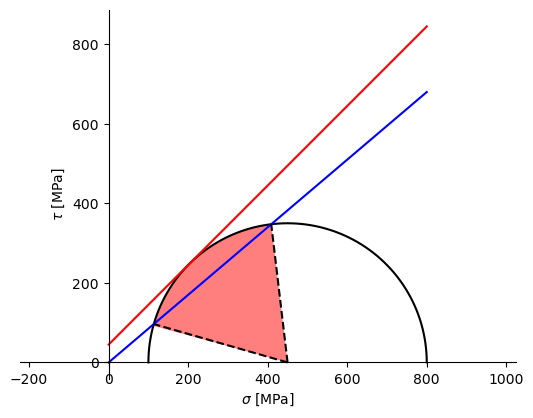

In [4]:
# Byerlee's static friction
mu_s = 0.85

# intersections of friction envelope with circle
ints = circle.line_intersections(mu_s, 0)
# angle of first intersection
angle_1 = circle.angle_at_coordinates(ints[0][0], ints[0][1]) 
# angle of second intersection
angle_2 = circle.angle_at_coordinates(ints[1][0], ints[1][1])
# angles beta_1 and beta_2
beta_1 = (np.pi - angle_1)/2
beta_2 = (np.pi - angle_2)/2
# make beta_1 the smaller angle
if beta_1 > beta_2:
    beta_1, beta_2 = beta_2, beta_1
# output results
print(f"Range of beta orientations for frictional slip is")
print(f"{np.degrees(beta_1):.1f} to {np.degrees(beta_2):.1f}°")

# plot
fig, ax = plt.subplots()
# circle
ax.plot(x, y, "k-")
# Mohr-Coulomb envelope
ax.plot(x_e, y_cme, "r-")
# friction envelope
y_fe = mu_s*x_e
ax.plot(x_e, y_fe, "b-")
# limits of frictional slip
ax.plot([center, ints[0][0]], [0, ints[0][1]], "k--")
ax.plot([center, ints[1][0]], [0, ints[1][1]], "k--")
# area of frictional slip
x_a , y_a = circle.coordinates(angle_1, angle_2)
x_a = np.append(x_a, center)
y_a = np.append(y_a, 0)
ax.fill(x_a, y_a, "red", alpha=0.5)
# axes labels
ax.set_xlabel(r"$\sigma$ [MPa]")
ax.set_ylabel(r"$\tau$ [MPa]")
# axes equal
ax.axis("equal")
# move axes to zero
ax.spines["bottom"].set_position("zero")
ax.spines["left"].set_position("zero")
# remove right and top spines
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()